**1. Introduction**

**1.1. Business Problem**

San Francisco became the World capital of IT innovations because of the Sillicon Valley and millions of young people are craving to 
come here to build their careers and thousands of people are already came. Moreover, Stanford University is one of the best universities in the world and thousands of people come to study at Standford each year. Thus, this project will focus on opening a night club for young people in San Francisco. We will not only focus on the most popular place but also focus on the safety since many people become drunk at night clubs and it's our duty to choose a safe place for them.

**1.2. Target Audience**

* A business entrepreneur that wants open a new restaurant in Milan.
* Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Milan using python, jupyter notebook and some machine learning techniques.
* Someone curious about data that want to have an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.

**2. Data**
In order to make a decision we will consider three types of datasets.
1.    San Francisco Registered Business Data (https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis)
2.    San Francisco Crime Data(https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783)
3.    Foursquare Data

Below you can see created tables 

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

**Registered Business Data**

In [2]:
business = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(business.shape)
business.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(264466, 31)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,1079490-06-161,2020,B & T Spray Equipment Inc,B & T Spray Equipment Inc,1911 Bay Rd,E Palo Alto,CA,94303.0,10/01/1968,06/30/2018,10/01/1968,06/30/2018,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0019947-01-999,19947,Parmalat Bakery Group Na,Mothers Cake & Cookie Co,99 Oakland Ca,Brisbane Q4068,NaN,0.0,10/01/1968,06/30/2018,10/01/1968,06/30/2018,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0024864-01-999,24864,Sf Spice Co Inc,Sf Spice Co Inc,P O Box 426 S S F,Brisbane Q4068,NaN,0.0,10/01/1968,03/04/2016,10/01/1968,03/04/2016,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0054014-01-999,54014,Allen Heating & Sheet Metal,Allen Heating & Sheet Metal,99 Greenbrae Ca,Brisbane Q4068,NaN,0.0,01/01/1969,03/17/2016,01/01/1969,03/17/2016,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0059484-01-999,59484,Mine Safety Appliances Co,Mine Safety Appliances Co,P O Box 426 Pittsburgh Pa,Brisbane Q4068,NaN,0.0,10/01/1968,03/07/2014,10/01/1968,03/07/2014,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#just pull the columns we need
business2 = business[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

#drop null values
business3 = business2.dropna()

#convert business start date to datetime
business3['Business Start Date'] = business3['Business Start Date'].astype('datetime64[ns]') 

#let's just look at areas that have seen the most businesses start in the last decade.
business4 = business3.loc[business3['Business Start Date'] > '2010-01-01']

#let's also rename 'Neighborhoods - Analysis Boundaries' to just be 'Neighborhoods'
business4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)

#let's do the same thing for the business name
business4.rename(columns={'DBA Name': 'Business Name'}, inplace = True)

business4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axis=axis,


,Business Start Date,Business Name,Neighborhood
238,2016-10-04,Live Imaging,Mission
247,2018-07-16,Seven Figure Shift,Chinatown
261,2019-09-18,Redmint One,Marina
287,2020-08-10,Stephany Sanchez,Oceanview/Merced/Ingleside
595,2013-01-30,Cloudpassage,Financial District/South Beach


In [4]:
#Count the number of businesses in each neighborhood by grouping the data
business5 = business4.groupby('Neighborhood', as_index=False).count()
business5.reset_index()
#let's get rid of the business start date, we won't be needing it anymore
business5.drop(columns = 'Business Start Date',inplace = True)
#rename our "business name" column to "Businesses" to reflect the count per neighborhood
business5.rename(columns={'Business Name': 'Businesses'}, inplace = True)
#and sort the data
business6 = business5.sort_values(by= ['Businesses'], ascending = False).head(10)
business6.reset_index(drop=True)
business6

,Neighborhood,Businesses
5,Financial District/South Beach,19665
18,Mission,10060
33,South of Market,8443
34,Sunset/Parkside,5854
0,Bayview Hunters Point,5602
35,Tenderloin,4296
16,Marina,4206
25,Outer Richmond,3940
2,Castro/Upper Market,3910
3,Chinatown,3775


In [5]:
#for reference, here is every neighborhood in SF as well as the count of registered businesses
business7 = business5.sort_values(by= ['Businesses'], ascending = False)
business7.reset_index(drop=True)
print(business7.shape)
business7

(41, 2)


,Neighborhood,Businesses
5,Financial District/South Beach,19665
18,Mission,10060
33,South of Market,8443
34,Sunset/Parkside,5854
0,Bayview Hunters Point,5602
35,Tenderloin,4296
16,Marina,4206
25,Outer Richmond,3940
2,Castro/Upper Market,3910
3,Chinatown,3775


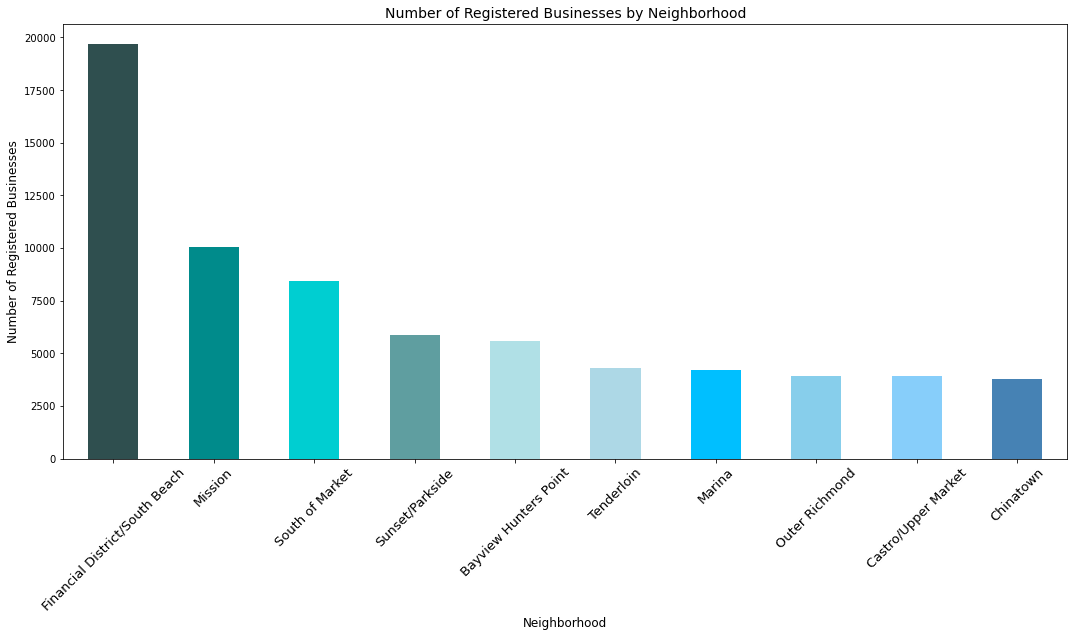

In [6]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


business6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Number of Registered Businesses by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered Businesses by Neighborhood', fontsize = 14)
plt.show()

In [ ]:
#It looks like the Financial District has the most businesses,
#but there are plenty of others that have lots of people working! Let's use the top 10 neighborhoods as our starting point.
#Next, we want to make sure our bar is in a safe part of town. So let's use San Francisco's 
#crime data from the last 5 years to narrow down our list.

**Crime Data**

In [7]:
#Crime Data
crime = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD')
print(crime.shape)
crime.head()

(402706, 36)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/08/15 08:56:00 AM,2020/08/15,08:56,2020,Saturday,2020/08/15 08:56:00 AM,95300907041,953009,200474239,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/08/15 09:40:00 AM,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/02/24 10:00:00 PM,2018/02/24,22:00,2018,Saturday,2018/03/02 10:13:00 AM,64174871000,641748,186051531,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/08/16 03:13:00 AM,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,II,Initial,NaN,4083,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",Open or Active,23RD ST \ ARKANSAS ST,23642000.0,Bayview,Potrero Hill,10.0,37.754827,-122.397729,"(37.75482657770952, -122.39772873392515)",54.0,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0
4,2020/08/16 03:38:00 AM,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,II,Initial,NaN,28100,Malicious Mischief,Vandalism,"Malicious Mischief, Breaking Windows",Open or Active,VALENCIA ST \ 15TH ST,24377000.0,Mission,Mission,9.0,37.766540,-122.422044,"(37.76653957529556, -122.42204381448558)",53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0


In [8]:
#take just the columns we need
crime1 = crime[['Analysis Neighborhood','Incident Category', 'Incident Date']]

#drop all null values
crime2 = crime1.dropna()

#convert incident date to datetime
crime2['Incident Date'] = crime2['Incident Date'].astype('datetime64[ns]') 

#filter to just crimes in the last 5 years, as the neighborhoods in san francisco are rapidly changing and being gentrified, we want data that is relevant to today's crime.
crime3 = crime2.loc[crime2['Incident Date'] > '2015-01-01']

#There's lots of scary crimes out there, but let's make sure we aren't factoring in non-criminal police reports, because that data will pollute our insights.
crime4 = crime3.loc[crime3['Incident Category'] != 'Non-Criminal']

#change the name of 'Analysis Neighborhood' to 'Neighborhood'
crime4.rename(columns={'Analysis Neighborhood': 'Neighborhood'}, inplace = True)

crime4.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axis=axis,


,Neighborhood,Incident Category,Incident Date
3,Potrero Hill,Assault,2020-08-16
4,Mission,Malicious Mischief,2020-08-16
6,Sunset/Parkside,Weapons Offense,2020-08-16
7,Western Addition,Missing Person,2020-08-12
8,Japantown,Larceny Theft,2020-08-14
9,Nob Hill,Other,2020-08-16
10,South of Market,Larceny Theft,2020-08-01
11,Chinatown,Lost Property,2020-08-15
13,Excelsior,Assault,2020-08-15
14,Haight Ashbury,Burglary,2020-08-13


In [9]:
#count the number of crimes in each neighborhood
crime5 = crime4.groupby('Neighborhood', as_index=False).count()
#get rid of Incident Date
crime5.drop(columns = 'Incident Date',inplace = True)
#rename our column to reflect the counts of incidents
crime5.rename(columns={'Incident Category': 'Incidents'}, inplace = True)
#and sort our values
crime6 = crime5.sort_values(by= ['Incidents'], ascending = False)
crime7 = crime6.head(10)
crime7

,Neighborhood,Incidents
18,Mission,40469
35,Tenderloin,36445
5,Financial District/South Beach,32012
33,South of Market,30278
0,Bayview Hunters Point,21858
40,Western Addition,11861
2,Castro/Upper Market,11071
22,North Beach,10862
20,Nob Hill,10479
34,Sunset/Parkside,10319


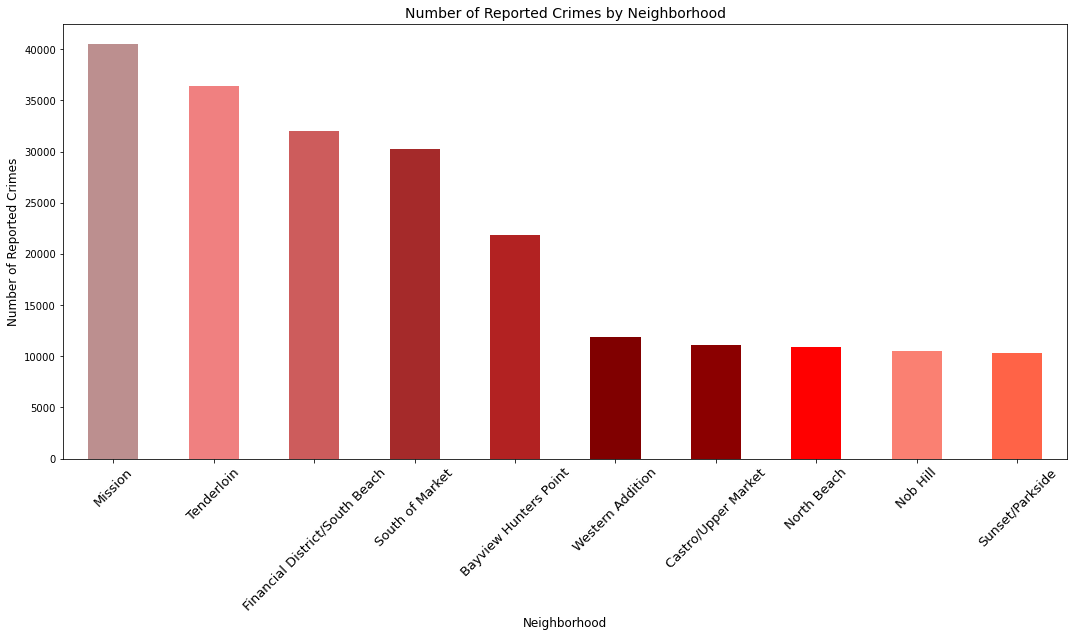

In [10]:
crime7.plot.bar(x = 'Neighborhood', y = 'Incidents', title = "Crime Incidents by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Reported Crimes by Neighborhood', fontsize = 14)
plt.show()

In [ ]:
#It looks like there are 5 spots with heavy crime rates in San Francisco, and the rest seem on par with eachother.
#Let's take our 10 favorite neighborhoods from before and sort out these 5 Neighborhoods with the highest crime rate.

In [11]:
#get a dataframe with the 5 highest incident neighborhoods
crime8 = crime7.head(5)
crime8

,Neighborhood,Incidents
18,Mission,40469
35,Tenderloin,36445
5,Financial District/South Beach,32012
33,South of Market,30278
0,Bayview Hunters Point,21858


In [12]:
'''start by merging the datasets and making a new dataset that incldues the neighborhoods 
which wereamong the top 10 for businesses AND are amond the top 5 for crime '''
Overlap = business6.merge(crime8, on=['Neighborhood'])
'''then take this joined dataframe and remove all common values from your list of top 10 
neighborhoods for businesses'''
SF_Neighborhoods = business6[(~business6.Neighborhood.isin(Overlap.Neighborhood))]
'''and what you have is the top neighborhoods for businesses that are NOT the top 
neighborhoods for crime'''
SF_Neighborhoods.head()

,Neighborhood,Businesses
34,Sunset/Parkside,5854
16,Marina,4206
25,Outer Richmond,3940
2,Castro/Upper Market,3910
3,Chinatown,3775


In [13]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="SF_explorer")
SF_Neighborhoods['Coordinates'] = SF_Neighborhoods['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
SF_Neighborhoods

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,5854,"(42.75562315, -81.19147418031011)"
16,Marina,4206,"(43.5139149, 16.1092196)"
25,Outer Richmond,3940,"(44.108805, -69.798725)"
2,Castro/Upper Market,3910,"(-34.6356668, -58.4193536)"
3,Chinatown,3775,"(40.7164913, -73.9962504)"


In [14]:
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Sunset/Parkside' , 'Coordinates'] = "(37.751616, -122.490810)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Outer Richmond' , 'Coordinates'] = "(37.780001, -122.490229)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Castro/Upper Market' , 'Coordinates'] = "(37.762932, -122.435395)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'West of Twin Peaks' , 'Coordinates'] = "(37.739871, -122.460106)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Marina' , 'Coordinates'] = "(37.801406, -122.439718)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Hayes Valley' , 'Coordinates'] = "(37.776685, -122.422936)"
SF_Neighborhoods

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else:


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,5854,"(37.751616, -122.490810)"
16,Marina,4206,"(37.801406, -122.439718)"
25,Outer Richmond,3940,"(37.780001, -122.490229)"
2,Castro/Upper Market,3910,"(37.762932, -122.435395)"
3,Chinatown,3775,"(40.7164913, -73.9962504)"


**Merging Datasets**

In [15]:
SF = SF_Neighborhoods.merge(crime6, on=['Neighborhood'])
SF.rename(columns={'Incidents':'Crimes'}, inplace = True)
SF = SF[['Neighborhood', 'Businesses', 'Crimes','Coordinates']]
SF['Coordinates'].to_string()
SF[['Latitude','Longitude']] = SF['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

SF

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,5854,10319,"(37.751616, -122.490810)",37.751616,-122.490810
1,Marina,4206,9163,"(37.801406, -122.439718)",37.801406,-122.439718
2,Outer Richmond,3940,8095,"(37.780001, -122.490229)",37.780001,-122.490229
3,Castro/Upper Market,3910,11071,"(37.762932, -122.435395)",37.762932,-122.435395
4,Chinatown,3775,6761,"(40.7164913, -73.9962504)",NaN,NaN


In [ ]:
#Foursquare Data Analysis
#Let's write a function to search the most popular venues within a .5 mile radius of our neighborhoods.